In [ ]:
!apt-get install sox

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
sox is already the newest version (14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!pip install librosa ipython numpy matplotlib japanize-matplotlib scipy soundfile

#  soxでwavファイルの長さを調整する

In [ ]:
!sox input.wav output.wav trim 0 1.5

"input.wav"は長さ調整したいファイルのパス、"output.wav"は調整後のファイルのパス。

 "trim 0 1"で"input.wav"の0秒~1.5秒を切り取って"output.wav"として保存する、というコマンドです。秒数は適宜変更。

In [ ]:
import librosa
import IPython

# 加工前の音声の確認
sr = 16000
x, sr = librosa.load("/content/input.wav", sr=sr)
display(IPython.display.Audio(x, rate=sr))

In [ ]:
# 加工後の音声の確認
sr = 16000
x, sr = librosa.load("/content/output.wav", sr=sr)
display(IPython.display.Audio(x, rate=sr))

# ローパス、ハイパス、バンドパスフィルタをかける

In [ ]:
# 関数の定義


from scipy import signal

# wave: フィルタをかけたい音声
# fs: サンプリング周波数(今回は16000)
# fe: ローパスフィルタの場合はfeよりも低い周波数成分を通す
#     ハイパスフィルタの場合はfeよりも高い周波数成分を通す
#     バンドパスフィルタの場合はfe1以上fe2以下の周波数成分を通す
# n: フィルタの次数(あんまり気にしないで良いです)



# ローパスフィルタ
def lpf(wave, fs, fe, n):
    nyq = fs / 2.0
    b, a = signal.butter(1, fe/nyq, btype='low')
    for i in range(0, n):
        wave = signal.filtfilt(b, a, wave)
    return wave


# ハイパスフィルタ
def hpf(wave, fs, fe, n):
    nyq = fs / 2.0
    b, a = signal.butter(1, fe/nyq, btype='high')
    for i in range(0, n):
        wave = signal.filtfilt(b, a, wave)
    return wave


# バンドパスフィルタ
def bpf(wave, fs, fe1, fe2, n):
    nyq = fs / 2.0
    b, a = signal.butter(1, [fe1/nyq, fe2/nyq], btype='band')
    for i in range(0, n):
        wave = signal.filtfilt(b, a, wave)
    return wave

In [ ]:
# 前のセルで定義した関数を使って、実際にローパスフィルタをかけていきます。


sr = 16000
x, sr = librosa.load("/content/input.wav", sr=sr)

# ローパスフィルタ(3000Hz以下を通す)
x = lpf(x, fs=sr, fe=3000, n=5)



# 音声の保存
import soundfile
soundfile.write(file='output.wav', data=x, samplerate=sr)

Text(0, 0.5, '周波数(Hz)')

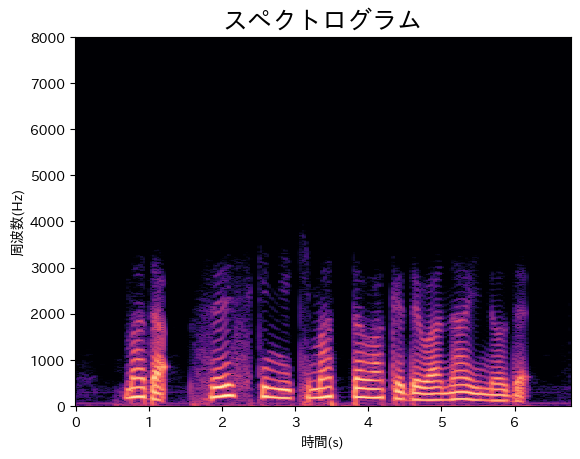

In [ ]:
# ちゃんとフィルタリングできているかの確認
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib



#FFT点数
n_fft = 2048
#窓長
win_length = 1024
#シフト量
hop_length = win_length//4


#短時間フーリエ変換
D = librosa.stft(x, n_fft=n_fft, win_length=win_length, hop_length=hop_length)

#Dは複素数なので絶対値をとって振幅を得る
S = np.abs(D)

#デシベルに変換
db = librosa.amplitude_to_db(S, ref=np.max)

#スペクトログラム表示
fig, ax = plt.subplots()
img = librosa.display.specshow(db, sr=sr, x_axis='time', y_axis='linear')
ax.set_title("スペクトログラム", fontsize=18) #タイトルの設定,なんかフォントサイズが小さかったのでサイズを変更
ax.set_xlabel("時間(s)") #x軸の設定
ax.set_ylabel("周波数(Hz)") #y軸の設定

In [ ]:
# 加工前の音声の確認
sr = 16000
x, sr = librosa.load("/content/input.wav", sr=sr)
display(IPython.display.Audio(x, rate=sr))

In [ ]:
# 加工後の音声の確認
sr = 16000
x, sr = librosa.load("/content/output.wav", sr=sr)
display(IPython.display.Audio(x, rate=sr))